# 3. Evaluate Dictionary-based Sentiment Analyzer

## 1. Sentiment values of the reviews

In [33]:
import pandas as pd

df = pd.read_csv('data/small_corpus_sentiment.csv')

In [34]:
df.head()

,reviewText,overall,sentimentScore
0,"The game is great, 5 stars, but anyone paying ...",1.0,0.666667
1,We had this on pre-order for 2 years. Forza 5 ...,1.0,0.138889
2,"Despite my having a high-powered PC, the game ...",1.0,-0.500000
3,"No Yao Ming, Michael Redd, Tayshaun Prince etc...",1.0,0.000000
4,Love this game series. Love playing GTA Libert...,1.0,-0.060606


Convert the sentiment scores of the into sentiment values.

https://datatofish.com/if-condition-in-pandas-dataframe/

In [35]:
def classify_sentiment_score(x):
    if x > 0.2:
        return 'positive'
    elif x < -0.2:
        return 'negative'
    else:
        return 'neutral'

In [36]:
df['sentimentCat'] = df['sentimentScore'].apply(lambda x: classify_sentiment_score(x))

In [37]:
df.head()

,reviewText,overall,sentimentScore,sentimentCat
0,"The game is great, 5 stars, but anyone paying ...",1.0,0.666667,positive
1,We had this on pre-order for 2 years. Forza 5 ...,1.0,0.138889,neutral
2,"Despite my having a high-powered PC, the game ...",1.0,-0.500000,negative
3,"No Yao Ming, Michael Redd, Tayshaun Prince etc...",1.0,0.000000,neutral
4,Love this game series. Love playing GTA Libert...,1.0,-0.060606,neutral


## 2. Rating classes

Convert the review ratings into rating classes.

In [38]:
def classify_review_score(x):
    if x == 5.0:
        return 'positive'
    elif x == 1.0:
        return 'negative'
    else:
        return 'neutral'

In [39]:
df['reviewCat'] = df['overall'].apply(lambda x: classify_review_score(x))

In [40]:
df.sample(10)

,reviewText,overall,sentimentScore,sentimentCat,reviewCat
1012,I ordered the deluxe edition and i'm really di...,1.0,-0.777778,negative,negative
3930,A1,5.0,0.000000,neutral,positive
3229,great starting game for the vita it shows what...,5.0,1.000000,positive,positive
1253,This is not a Gaming Mouse! It turns off ever...,1.0,-0.166667,neutral,negative
1593,"The graphics and animations are great looking,...",2.0,-0.600000,negative,neutral
1190,doesnt work with my Bluetooth sony gold headset,1.0,-1.000000,negative,negative
4021,Ever since my son got his first Turtle Beach h...,5.0,0.642857,positive,positive
1971,Really short and not that great of a product..,2.0,-1.000000,negative,neutral
976,I couldn't stand this game. This was NOTHING c...,1.0,0.066667,neutral,negative
3665,i won't judge this game to harshly since its a...,5.0,0.550000,positive,positive


## 3. Export results to the data file

In [41]:
df.to_csv(
        "data/small_corpus_sentiment_classes.csv",
        index=False)

## 4. Evaluate dictionary-based sentiment analyzer

### 4.1. Accuracy, precision and recall metrics for each class

In [42]:
from sklearn import metrics

In [43]:
y_true = df['reviewCat']

In [44]:
y_pred = df['sentimentCat']

a. Accuracy

- Manual calculation

In [45]:
len(df)

4500

In [46]:
df1 = df.apply(lambda x: True if x['sentimentCat'] == x['reviewCat'] else False, axis=1)
len(df1[df1 == True].index)

2533

In [47]:
2533/4500

0.5628888888888889

- Use scikit learn metrics

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [48]:
metrics.accuracy_score(y_true, y_pred)

0.5628888888888889

b. Precision

- Manual calculation

In [49]:
df1 = df.apply(
    lambda x: True if x['sentimentCat'] == 'positive' and x['sentimentCat'] == x['reviewCat'] else False,
    axis=1
)
len(df1[df1 == True].index)

1069

In [50]:
df1 = df.apply(
    lambda x: True if x['sentimentCat'] == 'positive'else False,
    axis=1
)
len(df1[df1 == True].index)

1683

In [51]:
1069 / 1683

0.6351752822341058

- Use scikit learn metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

In [52]:
metrics.precision_score(y_true, y_pred, labels=['positive'], average='micro')

0.6351752822341058

In [53]:
metrics.precision_score(y_true, y_pred, labels=['neutral'], average='micro')

0.42786985880908535

In [54]:
metrics.precision_score(y_true, y_pred, labels=['negative'], average='micro')

0.6456228956228957

c. Recall

- Use scikit learn metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

In [55]:
metrics.recall_score(y_true, y_pred, labels=['positive'], average='micro')

0.7126666666666667

In [56]:
metrics.recall_score(y_true, y_pred, labels=['neutral'], average='micro')

0.4646666666666667

In [57]:
metrics.recall_score(y_true, y_pred, labels=['negative'], average='micro')

0.5113333333333333

### 4.2 Write a textual summary on the performance of the sentiment analyzer

In [58]:
print('Classification report for sentiment analyzer classifier:\n%s\n'
      % (metrics.classification_report(y_true, y_pred)))

Classification report for sentiment analyzer classifier:
              precision    recall  f1-score   support

    negative       0.65      0.51      0.57      1500
     neutral       0.43      0.46      0.45      1500
    positive       0.64      0.71      0.67      1500

    accuracy                           0.56      4500
   macro avg       0.57      0.56      0.56      4500
weighted avg       0.57      0.56      0.56      4500




## 5.  Create a confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix

In [66]:
cm = confusion_matrix(y_true, y_pred, labels=['negative', 'neutral', 'positive'])

In [67]:
cm

array([[ 767,  582,  151],
       [ 340,  697,  463],
       [  81,  350, 1069]])

In [65]:
df_cm

Predicted,negative,neutral,positive
Actual,,,
negative,767,582,151
neutral,340,697,463
positive,81,350,1069


Plot confusion matrix using searborn

https://www.kaggle.com/agungor2/various-confusion-matrix-plots

https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

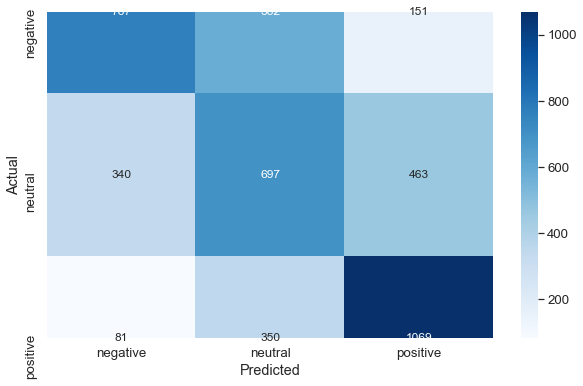

In [81]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10, 6))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, cmap='Blues', annot=True, fmt='d', annot_kws={'size': 12}) # font size